In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


plt.style.use('seaborn-v0_8-paper')

## **Problem 1 to 2:**

**Dataset link:** https://rb.gy/gsmddu

**Add a label to every axis and add a proper title for the charts (For every subplot, it is applicable). Also add proper labels if there are multiple representations.** Then, you can customize it as your wish.

### **Problem-1:** Make a subplots which have 2 plots.

- For the first chart, draw a scatter plot "*Monitored Cap.(MW)*" vs "*Total Cap. Under Maintenance (MW)*" of top 5 most frequent power stations. Then draw the lines which indicate the average values of these two columns. Change the colors according to the names of the Power Stations.
- For the second chart, draw a scatter plot "*Monitored Cap. (MW)*" vs "*Actual(MU)*" of the top 5 most frequent power stations. Also draw the lines which indicates the average values of these two columns. Change the colors according to the names of the Power Stations.


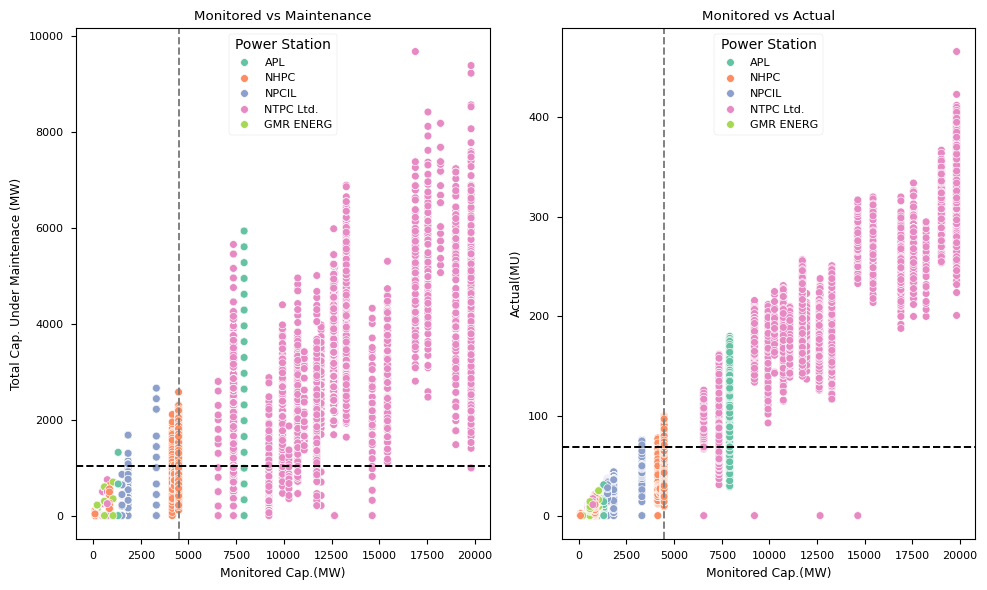

In [11]:
df = pd.read_csv('PowerGeneration.csv')
# Get top 5 power stations
top5 = df['Power Station'].value_counts().nlargest(5).index
df_top5 = df[df['Power Station'].isin(top5)]

# Calculate means
means = df_top5[['Monitored Cap.(MW)', 'Total Cap. Under Maintenace (MW)', 'Actual(MU)']].mean()

# Create scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
sns.scatterplot(data=df_top5, x='Monitored Cap.(MW)', y='Total Cap. Under Maintenace (MW)', hue='Power Station', palette='Set2', ax=ax1)
ax1.axvline(means['Monitored Cap.(MW)'], color='gray', linestyle='--')
ax1.axhline(means['Total Cap. Under Maintenace (MW)'], color='black', linestyle='--')
ax1.set_title("Monitored vs Maintenance")

sns.scatterplot(data=df_top5, x='Monitored Cap.(MW)', y='Actual(MU)', hue='Power Station', palette='Set2', ax=ax2)
ax2.axvline(means['Monitored Cap.(MW)'], color='gray', linestyle='--')
ax2.axhline(means['Actual(MU)'], color='black', linestyle='--')
ax2.set_title("Monitored vs Actual")

plt.tight_layout()
plt.show()

### **Problem-2:** Draw a 3D Scatter plot between "*Monitored Cap.(MW)*", "*Total Cap. Under Maintenace (MW)*" and "*Forced Maintanence(MW)*"

In [12]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df_top5,
    x='Monitored Cap.(MW)',
    y='Total Cap. Under Maintenace (MW)',
    z='Forced Maintanence(MW)',
    color='Power Station',
    title='3D Scatter: Monitored vs Maintenance vs Forced Maintenance'
)
fig.update_layout(showlegend=True, margin=dict(l=0, r=0, b=0, t=30))
fig.show()

### **Problem-3:** Make a 3D *Surface* plot of this below mathematical equation.

$$z = |x| - |y|$$

In [13]:
import plotly.graph_objects as go
import numpy as np

# Generate x, y grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

# Compute z = |x| - |y|
z = np.abs(x) - np.abs(y)

# Create 3D surface plot
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z, colorscale='Blues')])

# Add and style title
fig.update_layout(
    title={
        'text': '3D Surface Plot: z = |x| - |y|',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=20, family='Arial')
    },
    margin=dict(l=0, r=0, b=0, t=50),
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)

fig.show()


### **Problem-4:** Draw the 3D *Contour plot* of this below equation:

$$z = |x| - |y|$$

In [14]:
import plotly.graph_objects as go
import numpy as np

# Generate x, y grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)
z = np.abs(x) - np.abs(y)

# Create 3D contour plot
fig = go.Figure(data=[
    go.Surface(
        x=x,
        y=y,
        z=z,
        colorscale='Blues',
        showscale=True,
        contours={
            "x": {"show": True, "color": "black"},
            "y": {"show": True, "color": "black"},
            "z": {"show": True, "color": "black"}
        }
    )
])

# Update layout with titles
fig.update_layout(
    title='3D Contour Plot of z = |x| - |y|',
    margin={"l": 0, "r": 0, "b": 0, "t": 40},
    scene={
        "xaxis_title": "X",
        "yaxis_title": "Y",
        "zaxis_title": "Z"
    }
)

fig.show()


### **Problem-5:** Draw a second type of Countour plot of the below equation:

$$z = |x| - |y|$$

In [15]:
import plotly.graph_objects as go
import numpy as np

# Generate x, y grid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)
z = np.abs(x) - np.abs(y)

# Create 2D contour plot
fig = go.Figure(data=go.Contour(x=x[0], y=y[:,0], z=z, colorscale='Blues', contours=dict(showlabels=True)))
fig.update_layout(title='2D Contour: z = |x| - |y|', margin=dict(l=0, r=0, b=0, t=30))
fig.show()

## `Problem 6-7`

Data Set Link - https://docs.google.com/spreadsheets/d/17tUL2yC7MGvo7txuuhLtAI-b6_C4jc0t7FLFxqRm-uI/edit?usp=share_link


**Description of Dataset:**

* Date: It gives the date of which stocks details are given.
* Symbol: Name of stock
* Open: It gives the opening price of stock on that date.
* High: It gives the highest price to which the stock ascened on that day.
* Low: It gives the highest price to which the stock plummeted on that day.
* Close: It gives the closing price of stock on that date.
* Volume: It gives the amount of stock traded on that date.
* VWAP: The volume-weighted average price (VWAP) is a statistic used by traders to determine what the average price is based on both price and volume.
* Turnover:

In [6]:
import plotly.express as px
import pandas as pd
import numpy as np

df = pd.read_csv('Nifty50.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Filter HDFCBANK
data = df[df['Symbol'] == 'HDFCBANK']

# Plot Close Price
fig1 = px.line(data, x='Date', y='Close', title='HDFCBANK Close Price', color_discrete_sequence=['blue'])
fig1.update_layout( margin=dict(l=0, r=10, b=10, t=30))

# Plot Volume
fig2 = px.line(data, x='Date', y='Volume', title='HDFCBANK Volume', color_discrete_sequence=['orange'])
fig2.update_layout( margin=dict(l=0, r=10, b=10, t=30))

fig1.show()
fig2.show()



### `Problem-7` Scatter plot Close price vs Volume for TOP-5 Stocks in year 2021
* Color on Symbol Column

In [7]:

df_2021 = df[df['Date'].dt.year == 2021]

# Get top 5 stocks by volume
top_5 = df_2021.groupby('Symbol')['Volume'].sum().nlargest(5).index
df_top_5 = df_2021[df_2021['Symbol'].isin(top_5)]

# Scatter plot
fig = px.scatter(df_top_5, x='Volume', y='Close', color='Symbol', title='Top-5 Stocks: Close vs Volume (2021)')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))
fig.show()

### `Problem-8` Create a 3-D Scatter Plot using `time,x,y` on below synthetic data. and give color gradiant on `z`
```
# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame from the dataset
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})
```

In [9]:
import plotly.express as px
import numpy as np
import pandas as pd

# Create a 3D dataset
time = np.linspace(0, 10, 100)
x = np.sin(time)
y = np.cos(time)
z = time

# Create a DataFrame
data = pd.DataFrame({'time': time, 'x': x, 'y': y, 'z': z})

# Create 3D scatter plot with color gradient based on z
fig = px.scatter_3d(data, x='x', y='y', z='z', color='z', title='3D Scatter Plot: x vs y vs z')
fig.update_layout(width=1000, height=600)
fig.show()


### `Problem 9:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = sin(\sqrt{x^2 + y^2})$$


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create meshgrid
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Surface plot with colorscale defined in the trace
fig1 = go.Figure(data=[go.Surface(x=x, y=y, z=z, colorscale='Blues')])
fig1.update_layout(title='Surface Plot', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Contour plot (lines)
fig2 = go.Figure(data=[go.Contour(x=x[0], y=y[:, 0], z=z, colorscale='blues')])
fig2.update_layout(title='Contour Plot')

# Filled contour plot
fig3 = go.Figure(data=[go.Contour(x=x[0], y=y[:, 0], z=z, colorscale='blues', contours=dict(showlabels=True))])
fig3.update_layout(title='Filled Contour Plot')

# Show plots
fig1.show()
fig2.show()
fig3.show()

### `Problem 10:` Create a surface plot and the 2 types of the contour plots of the below equation.

$$z = tan(\log_2({x^2 + y^2})$$

In [18]:
import plotly.graph_objects as go
import numpy as np

# Meshgrid and z calculation
x, y = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
z = np.tan(np.log2(x**2 + y**2))

# Surface plot
fig1 = go.Figure(go.Surface(x=x, y=y, z=z, colorscale='Viridis'))
fig1.update_layout(title='Surface Plot', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

# Contour plot
fig2 = go.Figure(go.Contour(x=x[0], y=y[:,0], z=z, colorscale='Viridis'))
fig2.update_layout(title='Contour Plot')

# Filled contour plot
fig3 = go.Figure(go.Contour(x=x[0], y=y[:,0], z=z, colorscale='Viridis', contours=dict(showlabels=True)))
fig3.update_layout(title='Filled Contour Plot')
fig.update_layout(width=1000, height=600)

# Show plots
fig1.show()
fig2.show()
fig3.show()